In [494]:
#kütüphaneleri aktardık
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import math
import statistics
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [495]:
df = pd.read_csv("kesifselVeriAnalizi.csv") 

In [496]:
df.head()

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,4
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,3
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,3


In [497]:
df.dtypes

age             float64
gender            int64
height          float64
weight          float64
body_fat        float64
diastolic       float64
systolic        float64
grip_force      float64
bend_forward    float64
sit_ups         float64
broad_jump      float64
class             int64
dtype: object

# aykırı değer tespiti

grip_force

In [498]:
df['grip_force'].describe()

count    13393.000000
mean        36.963877
std         10.624864
min          0.000000
25%         27.500000
50%         37.900000
75%         45.200000
max         70.500000
Name: grip_force, dtype: float64

In [499]:
X = df[['grip_force']].values
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)
means = gmm.means_.flatten()
covariances = gmm.covariances_.flatten()
weights = gmm.weights_.flatten()
mean1, mean2 = means
var1, var2 = covariances
intersection = (mean1 * var2 + mean2 * var1) / (var1 + var2)

print(f"İki tepenin kesişim noktası (eşik değeri): {intersection}")

İki tepenin kesişim noktası (eşik değeri): 33.563327386859946


In [500]:
low_group = df[df['grip_force'] < intersection]
high_group = df[df['grip_force'] >= intersection]

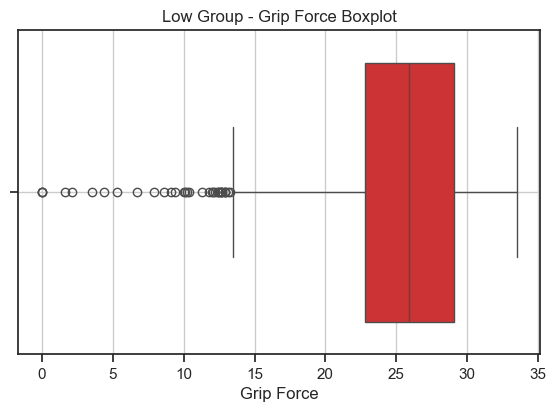

In [501]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=low_group['grip_force'])

plt.title("Low Group - Grip Force Boxplot")
plt.xlabel("Grip Force")
plt.grid(True)

plt.show()

In [502]:
# LOW GROUP → median ile doldur
low_median = low_group['grip_force'].median()

# IQR sınırları dışında kalanlara median ata
low_group['grip_force'] = low_group['grip_force'].apply(
    lambda x: low_median if (x < lower_bound_low) or (x > upper_bound_low) else x
)

# HIGH GROUP → median ile doldur
high_median = high_group['grip_force'].median()

high_group['grip_force'] = high_group['grip_force'].apply(
    lambda x: high_median if (x < lower_bound_high) or (x > upper_bound_high) else x
)


In [503]:
# Grupları birleştir
merged_groups = pd.concat([low_group, high_group])

# Ana df’ye geri aktar
df['grip_force'] = merged_groups['grip_force']

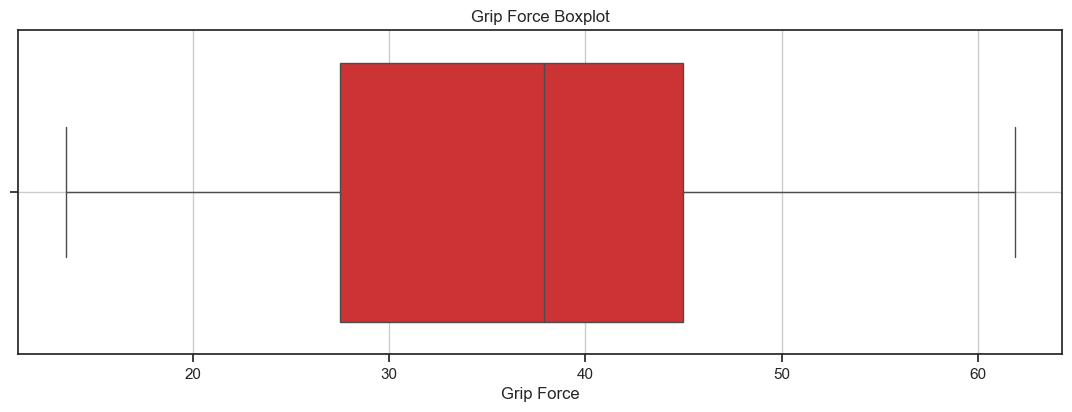

In [504]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['grip_force'])

plt.title("Grip Force Boxplot")
plt.xlabel("Grip Force")
plt.grid(True)

plt.show()

broad_jump

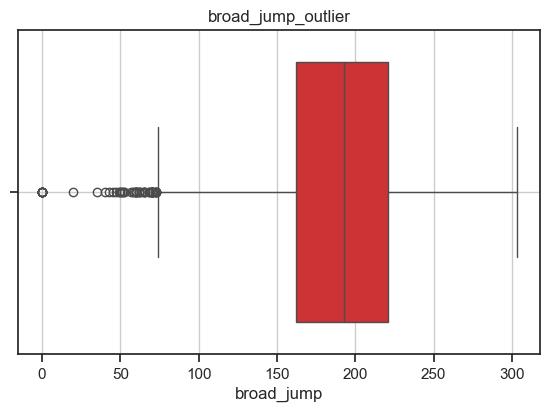

In [505]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['broad_jump'])

plt.title("broad_jump_outlier")
plt.xlabel("broad_jump")
plt.grid(True)

plt.show()

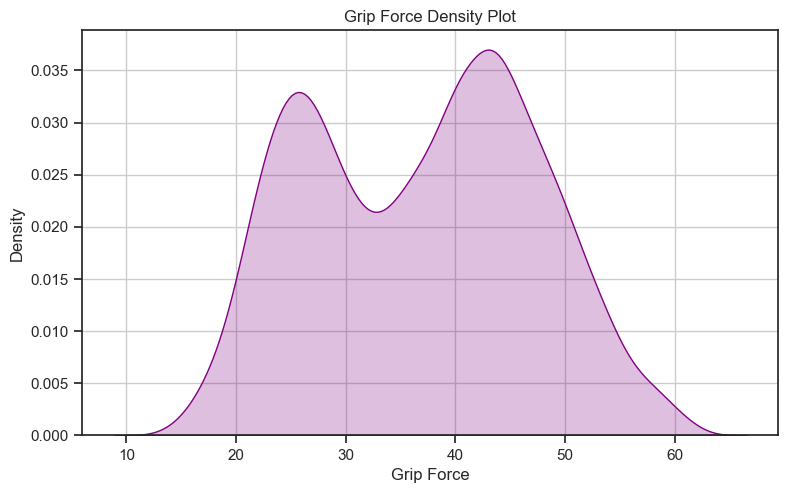

In [506]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['grip_force'], fill=True, color='purple')
plt.title('Grip Force Density Plot')
plt.xlabel('Grip Force')
plt.ylabel('Density')
plt.grid(True)

plt.show()

In [507]:
#broad_jump
df['broad_jump'].describe()

count    13393.000000
mean       190.129627
std         39.868000
min          0.000000
25%        162.000000
50%        193.000000
75%        221.000000
max        303.000000
Name: broad_jump, dtype: float64

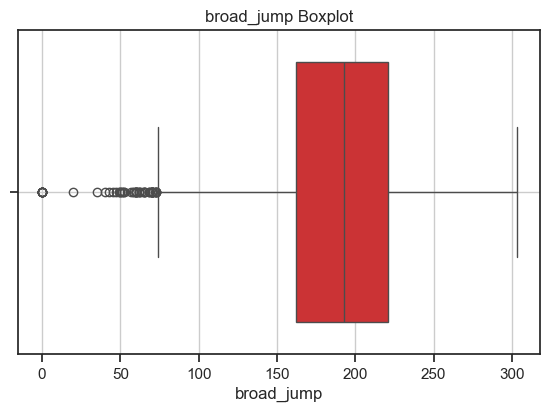

In [508]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['broad_jump'])

plt.title("broad_jump Boxplot")
plt.xlabel("broad_jump")
plt.grid(True)

plt.show()

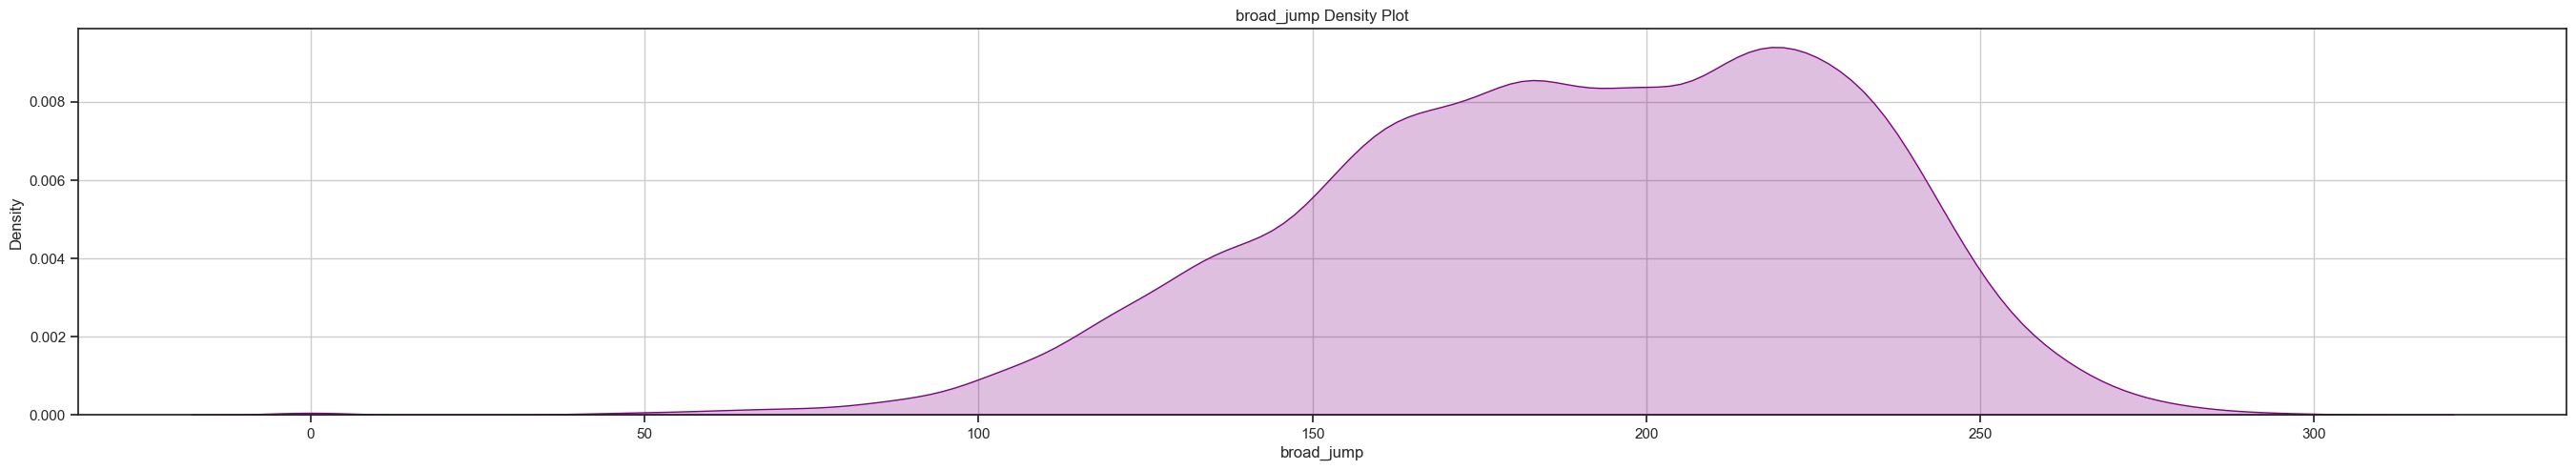

In [509]:
plt.figure(figsize=(30, 5))
sns.kdeplot(df['broad_jump'], fill=True, color='purple')
plt.title('broad_jump Density Plot')
plt.xlabel('broad_jump')
plt.ylabel('Density')
plt.grid(True)

plt.show()

In [510]:
# Fonksiyon: Tüm df’deki bir sütuna IQR sınırıyla doldurma uygula
def iqr_fill_to_bounds_full(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri IQR sınırlarına çek
    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

# Uygula → doğrudan ana df üstünde
iqr_fill_to_bounds_full(df, 'broad_jump')


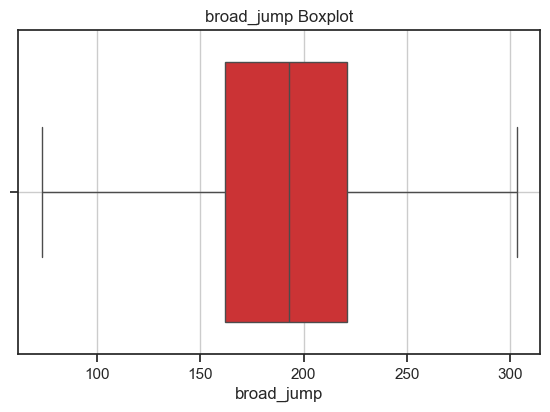

In [511]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['broad_jump'])

plt.title("broad_jump Boxplot")
plt.xlabel("broad_jump")
plt.grid(True)

plt.show()

In [512]:
df.dtypes

age             float64
gender            int64
height          float64
weight          float64
body_fat        float64
diastolic       float64
systolic        float64
grip_force      float64
bend_forward    float64
sit_ups         float64
broad_jump      float64
class             int64
dtype: object

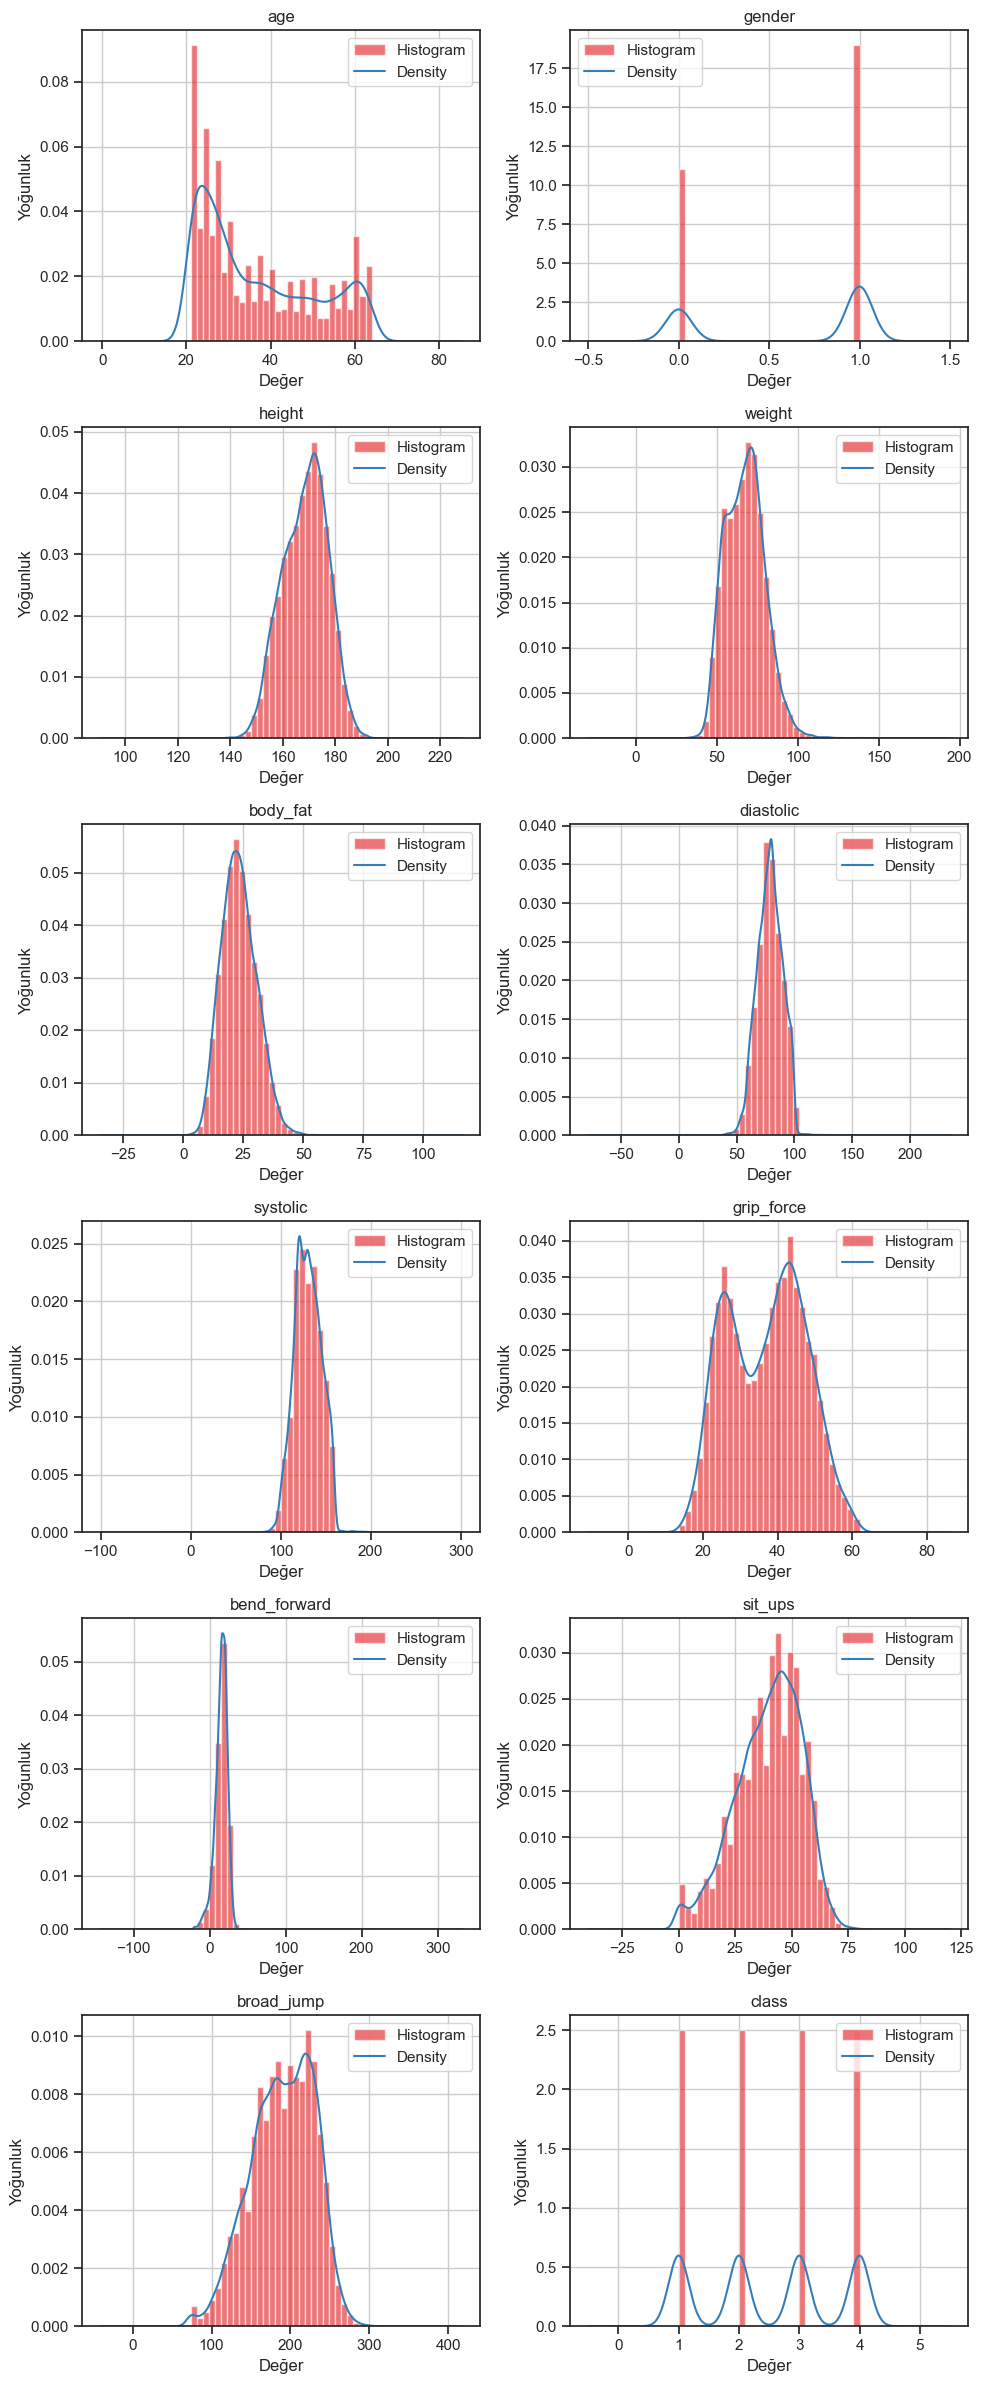

<Figure size 640x480 with 0 Axes>

In [513]:

num_columns = len(df.columns)
cols = 2
rows = math.ceil(num_columns/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4)) #tüm figürün eksenlerinin genişlik yükseklik ayarını yaptık
axes = axes.flatten()# 5️⃣ axes dizisini düzleştir (flatten), böylece tek boyutlu liste gibi erişebiliriz, aksi halde axes[row][col] şeklinde erişmek gerekirdi

# Her sütun için ayrı subplot'ta hem histogram hem KDE çiz
for i, column in enumerate(df.columns):
    ax = axes[i] # İlgili subplot eksenini al
    # Histogram (density=True → toplam alan = 1)
    # kind='hist': histogram grafiği
    # bins=30: 30 aralık (bin) ile
    # density=True: toplam alan 1'e normalize edilir (KDE ile uyumlu)
    # alpha=0.6: yarı saydamlık (0=şeffaf, 1=opak)
    # ax=ax: bu grafiği ilgili subplot eksenine çiz
    # label='Histogram': legend'de görünecek isim
    df[column].plot(kind='hist', bins=30, density=True, alpha=0.6, ax=ax, label='Histogram')

    # KDE (density) eğrisi çiziyoruz:
    # kind='kde': yoğunluk fonksiyonu (pürüzsüz eğri)
    # ax=ax: yine aynı subplot'a çiz
    # label='Density': legend'de görünecek isim
    df[column].plot(kind='kde', ax=ax, label='Density')
    # Başlık ve etiketler
    ax.set_title(column)
    ax.set_xlabel('Değer')
    ax.set_ylabel('Yoğunluk')
    ax.legend()     # Legend ekliyoruz (hangi renk neyi temsil ediyor görünsün diye)
    ax.grid(True)

plt.tight_layout() # Grafikler arası boşlukları ve hizalamayı düzgün yapıyoruz
plt.show()
plt.savefig("data_processing_all_density_hist_subplots1.jpg", format='jpg', dpi=300)


In [ ]:
##df.to_csv('cleaned_data.csv', index=False)
